# Does the average age of residents relate to how often people visit Annette?
I will be conducting an observational because I'm  ot changing anyhting the study based on the whole population of reviews. I will be examining 2 variables in my data.
I collected the data with the help of ChatGPT. I decide to keep some data based on the google review categories that i needed and didn't. I only included popular restaurants or those with lots of reviews and smaller or newer restaurants are missing, so your dataset isn’t representative of all restaurants in Denver/Aurora.

In [3]:
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [5]:
df = pd.read_csv("annette_mock_dataset.csv")

df.head(5)

,Restaurant,Google_Reviews,Yelp_Reviews,Google_Rating,Yelp_Rating
0,Annette,800,NaN,4.7,NaN
1,Mercantile Dining,600,550.0,4.6,4.4
2,The Wolf’s Tail,400,350.0,4.3,4.0
3,Bistro Vendome,500,480.0,4.5,4.3
4,Safta,700,650.0,4.6,4.5


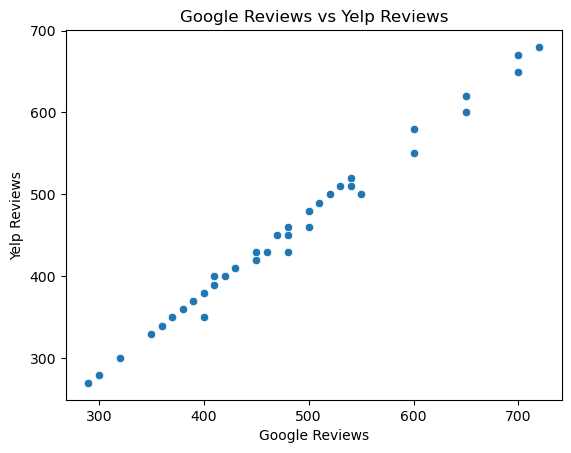

In [6]:
sns.scatterplot(data=df, x="Google_Reviews", y="Yelp_Reviews")
plt.title("Google Reviews vs Yelp Reviews")
plt.xlabel("Google Reviews")
plt.ylabel("Yelp Reviews")
plt.show()

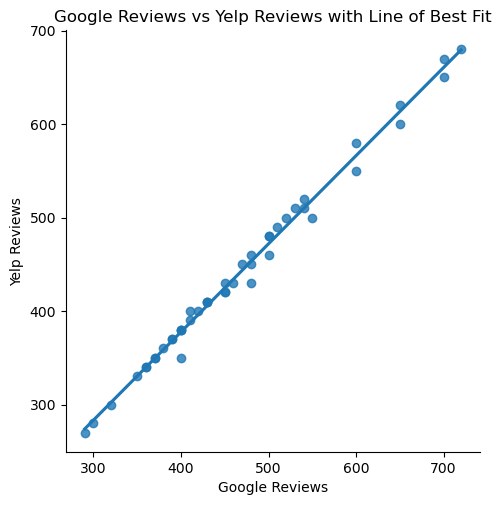

In [7]:
sns.lmplot(data=df, x="Google_Reviews", y="Yelp_Reviews", ci=None)
plt.title("Google Reviews vs Yelp Reviews with Line of Best Fit")
plt.xlabel("Google Reviews")
plt.ylabel("Yelp Reviews")
plt.show()

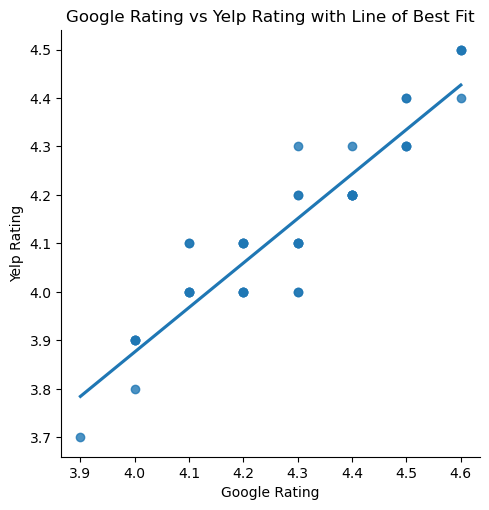

Predicted Yelp Rating for Annette: 4.52


In [8]:
sns.lmplot(data=df, x="Google_Rating", y="Yelp_Rating", ci=None)
plt.title("Google Rating vs Yelp Rating with Line of Best Fit")
plt.xlabel("Google Rating")
plt.ylabel("Yelp Rating")
plt.show()

# Step 3: Predict Annette's missing Yelp Rating
# Remove rows where Yelp_Rating is missing
df_train = df[df["Yelp_Rating"].notna()]

# Prepare X and y
X = df_train[["Google_Rating"]].values
y = df_train["Yelp_Rating"].values

# Fit Linear Regression
model = LinearRegression()
model.fit(X, y)

# Predict Annette's Yelp Rating
annette_google_rating = df[df["Restaurant"]=="Annette"]["Google_Rating"].values.reshape(-1,1)
predicted_yelp_rating = model.predict(annette_google_rating)

print(f"Predicted Yelp Rating for Annette: {predicted_yelp_rating[0]:.2f}")

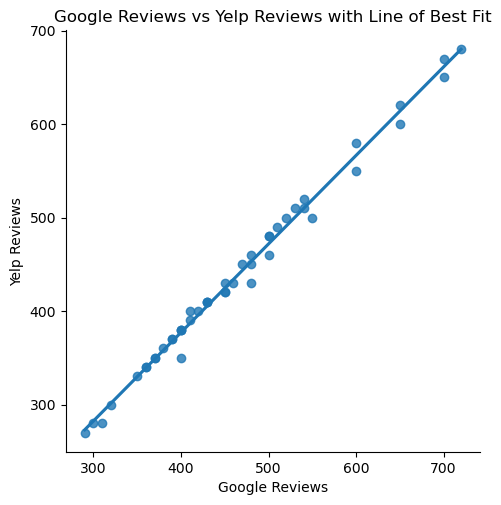

Predicted Yelp Reviews for Annette: 755


In [13]:
sns.lmplot(data=df, x="Google_Reviews", y="Yelp_Reviews", ci=None)
plt.title("Google Reviews vs Yelp Reviews with Line of Best Fit")
plt.xlabel("Google Reviews")
plt.ylabel("Yelp Reviews")
plt.show()

# Step 3: Predict Annette's missing Yelp review using Linear Regression
# Remove rows where Yelp_Reviews is missing
df_train = df[df["Yelp_Reviews"].notna()]

# Prepare X and y
X = df_train[["Google_Reviews"]].values
y = df_train["Yelp_Reviews"].values

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predict Annette's Yelp review
annette_google_reviews = df[df["Restaurant"]=="Annette"]["Google_Reviews"].values.reshape(-1,1)
predicted_yelp = model.predict(annette_google_reviews)

print(f"Predicted Yelp Reviews for Annette: {int(predicted_yelp[0])}")


In [9]:
correlation = df["Google_Reviews"].corr(df["Yelp_Reviews"], method="pearson")

print("Pearson Correlation Coefficient (Google vs Yelp Reviews):", correlation)


Pearson Correlation Coefficient (Google vs Yelp Reviews): 0.9958499395730411


In [10]:
r = df["Google_Reviews"].corr(df["Yelp_Reviews"], method="pearson")

# Step 2: Square it to get R²
r_squared = r**2

print("Pearson Correlation Coefficient (r):", r)
print("Coefficient of Determination (R²):", r_squared)


Pearson Correlation Coefficient (r): 0.9958499395730411
Coefficient of Determination (R²): 0.9917171021476296


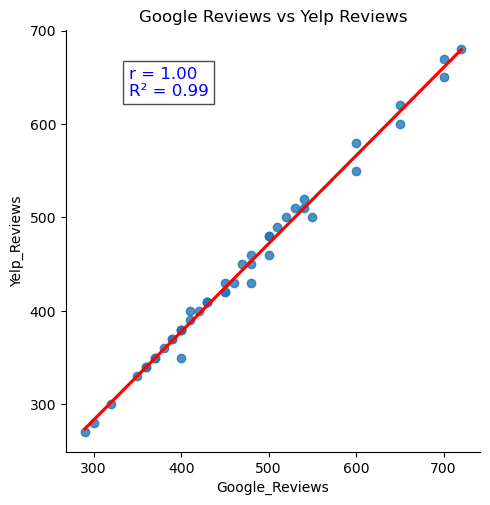

In [11]:
sns.lmplot(data=df, x="Google_Reviews", y="Yelp_Reviews", ci=None, line_kws={"color": "red"})
plt.title("Google Reviews vs Yelp Reviews")

# Add r and R² values to the plot
plt.text(
    x=df["Google_Reviews"].min() + 50,
    y=df["Yelp_Reviews"].max() - 50,
    s=f"r = {r:.2f}\nR² = {r_squared:.2f}",
    fontsize=12,
    color="blue",
    bbox=dict(facecolor="white", alpha=0.7)
)

plt.show()

In [12]:
df_train = df.dropna(subset=["Yelp_Reviews"])

# Define predictor (X) and target (y)
X = df_train[["Google_Reviews"]]
y = df_train["Yelp_Reviews"]

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict Yelp reviews for Annette (Google Reviews = 800)
annette_google_reviews = np.array([[800]])
predicted_yelp = model.predict(annette_google_reviews)

print(f"Predicted Yelp Reviews for Annette: {predicted_yelp[0]:.0f}")

Predicted Yelp Reviews for Annette: 755


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Annette predicted yelp reviews is around 755 while the actual yelp reviews is 484.

Outliers in Google Reviews or Yelp Reviews:
    Restaurant  Google_Reviews  Yelp_Reviews  Google_Rating  Yelp_Rating
9  The Kitchen             720         680.0            4.6          4.5


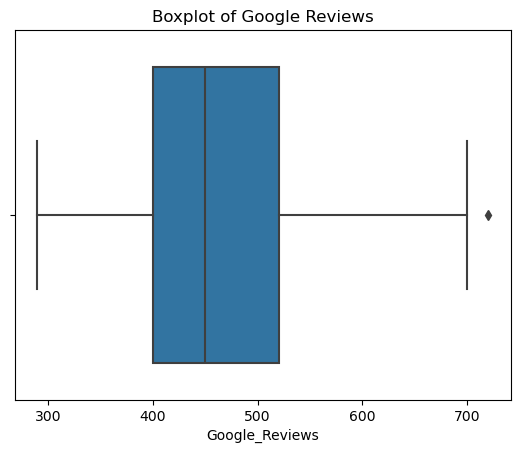

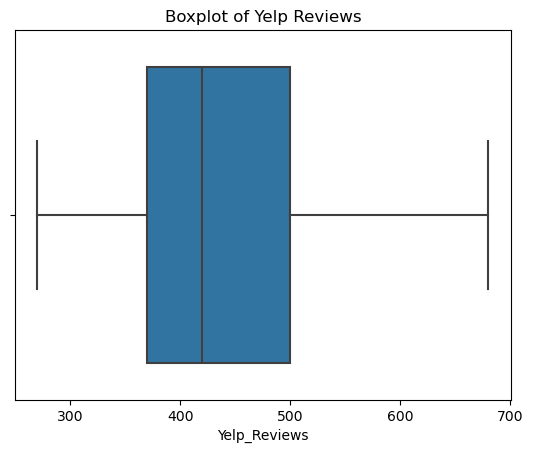

In [14]:
x = df["Google_Reviews"]
y = df["Yelp_Reviews"]

# Drop rows where Yelp_Reviews is missing
df_clean = df.dropna(subset=["Yelp_Reviews"])

# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile) for each variable
Q1_x = df_clean["Google_Reviews"].quantile(0.25)
Q3_x = df_clean["Google_Reviews"].quantile(0.75)
IQR_x = Q3_x - Q1_x

Q1_y = df_clean["Yelp_Reviews"].quantile(0.25)
Q3_y = df_clean["Yelp_Reviews"].quantile(0.75)
IQR_y = Q3_y - Q1_y

# Step 2: Determine outlier boundaries
lower_x = Q1_x - 1.5 * IQR_x
upper_x = Q3_x + 1.5 * IQR_x

lower_y = Q1_y - 1.5 * IQR_y
upper_y = Q3_y + 1.5 * IQR_y

# Step 3: Identify outliers
outliers = df_clean[
    (df_clean["Google_Reviews"] < lower_x) | (df_clean["Google_Reviews"] > upper_x) |
    (df_clean["Yelp_Reviews"] < lower_y) | (df_clean["Yelp_Reviews"] > upper_y)
]

print("Outliers in Google Reviews or Yelp Reviews:")
print(outliers)


sns.boxplot(x=df_clean["Google_Reviews"])
plt.title("Boxplot of Google Reviews")
plt.show()

sns.boxplot(x=df_clean["Yelp_Reviews"])
plt.title("Boxplot of Yelp Reviews")
plt.show()

In [16]:


# Step 1: Identify outliers using IQR
df_clean = df.dropna(subset=["Yelp_Reviews"])  # remove missing Yelp Reviews for training

Q1_x = df_clean["Google_Reviews"].quantile(0.25)
Q3_x = df_clean["Google_Reviews"].quantile(0.75)
IQR_x = Q3_x - Q1_x

Q1_y = df_clean["Yelp_Reviews"].quantile(0.25)
Q3_y = df_clean["Yelp_Reviews"].quantile(0.75)
IQR_y = Q3_y - Q1_y

# Outlier boundaries
lower_x = Q1_x - 1.5 * IQR_x
upper_x = Q3_x + 1.5 * IQR_x
lower_y = Q1_y - 1.5 * IQR_y
upper_y = Q3_y + 1.5 * IQR_y

# Identify outliers
outliers = df_clean[
    (df_clean["Google_Reviews"] < lower_x) | (df_clean["Google_Reviews"] > upper_x) |
    (df_clean["Yelp_Reviews"] < lower_y) | (df_clean["Yelp_Reviews"] > upper_y)
]

# Step 2: Regression with outliers included
X_incl = df_clean[["Google_Reviews"]]
y_incl = df_clean["Yelp_Reviews"]
model_incl = LinearRegression()
model_incl.fit(X_incl, y_incl)
pred_incl = model_incl.predict(np.array([[800]]))[0]  # Annette Google Reviews = 800

# Step 3: Regression with outliers removed
df_no_outliers = df_clean.drop(outliers.index)
X_excl = df_no_outliers[["Google_Reviews"]]
y_excl = df_no_outliers["Yelp_Reviews"]
model_excl = LinearRegression()
model_excl.fit(X_excl, y_excl)
pred_excl = model_excl.predict(np.array([[800]]))[0]

# Step 4: Create a comparison table
impact_table = pd.DataFrame({
    "Scenario": ["With Outliers", "Without Outliers"],
    "Predicted Yelp Reviews for Annette": [round(pred_incl), round(pred_excl)]
})

print(impact_table)

           Scenario  Predicted Yelp Reviews for Annette
0     With Outliers                                 755
1  Without Outliers                                 755


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
